<a href="https://colab.research.google.com/github/martindevoto/machine-learning-notebooks-personal/blob/main/NLP04_Project_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification

In this section, we will apply NLP techniques to perform a sentiment classification for movie reviews, determining if a review is rather positive or negative.

Let's start!

In [1]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [2]:
# In case you don't have these libraries installed, 
# you may install them by uncommenting the following lines:

# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install sklearn
# !pip install -U spacy
# import spacy.cli
# spacy.cli.download("en_core_web_sm")

# After installation, you may run the imports cell below again!

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import spacy
sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


# Loading and exploring the Dataset

In [4]:
df = pd.read_csv('/content/MyDrive/My Drive/smsspamcollection.tsv',sep='\t')

In [5]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [6]:
len(df)

5572

## Let's show the attribute .shape of the dataset

In [7]:
# Try it here!

## Check a random row from the dataset
#### use a random index on the dataset

In [8]:
# Print a random row from the Dataset

# print(df['message'][8])

#Looking for (and cleaning) null reviews

In [9]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [12]:
len(df)

5572

In [13]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

#Checking the class balance

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


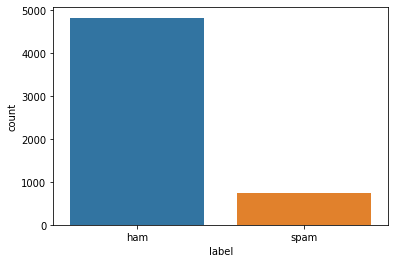

In [14]:
sns.countplot(df['label'])

# Separating the dataset into Train and Test

In [15]:
X = df['message']

In [16]:
y = df['label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=42) 

# Reviewing the Vectorizer

## Let's create a separate Vectorizer
Run the comands below to create a new TF-IDF Vectorizer

In [18]:
# tfidf = TfidfVectorizer(stop_words=all_stopwords, max_df=0.7, min_df=2)

##Preparing the Vectorizer
The line below 'trains' the vectorizer with all the words from the dataset, and then it TRANSFORMS the data into numeric values

In [19]:
# vectorized_data = tfidf.fit_transform(df['message'])

## Checking the output

The resulting data has the following structure: 
`(document_id, token_id) -------- numeric_weight`

This means that the data is now numeric, and we can use it to train ML Models

In [20]:
# print(vectorized_data.shape[0])
# print(vectorized_data)

If we want to know which token corresponds to the above ids, we need to run the `get_feature_names()` method, which will return a LIST of all the words in the corpus (dataset). Find the word you want by using the token_ids as indexes on the resulting list. Try it below!

In [21]:
# tfidf.get_feature_names() #will return the whole list of existing words within the dataset (WITH WEIGHT > 0). Try out some ids on it

# Creating a NLP Classification Model

In [22]:
text_clf = Pipeline([('tfidf',TfidfVectorizer(stop_words=all_stopwords, max_df=0.7, min_df=2)),('clf',LinearSVC())])

In [23]:
text_clf.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.7, min_df=2,
                                 stop_words={"'d", "'ll", "'m", "'re", "'s",
                                             "'ve", 'a', 'about', 'above',
                                             'across', 'after', 'afterwards',
                                             'again', 'against', 'all',
                                             'almost', 'alone', 'along',
                                             'already', 'also', 'although',
                                             'always', 'am', 'among', 'amongst',
                                             'amount', 'an', 'and', 'another',
                                             'any', ...})),
                ('clf', LinearSVC())])

#Evaluation Metrics

In [24]:
predictions = text_clf.predict(X_test)

In [25]:
print(confusion_matrix(y_test,predictions))

[[728   1]
 [ 10  97]]


In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       729
        spam       0.99      0.91      0.95       107

    accuracy                           0.99       836
   macro avg       0.99      0.95      0.97       836
weighted avg       0.99      0.99      0.99       836



In [27]:
print(accuracy_score(y_test,predictions))

0.9868421052631579


#Predicting sentiment associated with a movie review

In [28]:
new_ham = [u"For fear of fainting with the of all that housework you just did? Quick have a cuppa"]

In [29]:
new_ham = pd.Series(new_ham)

In [30]:
text_clf.predict(new_ham)

array(['ham'], dtype=object)

In [31]:
new_spam = [u"URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18"]

In [32]:
new_spam = pd.Series(new_spam)

In [33]:
text_clf.predict(new_spam)

array(['spam'], dtype=object)

In [34]:
spam_group = df[df['label']=='spam'].iloc[2:30,:].index

In [35]:
print(spam_group)

Int64Index([  8,   9,  11,  12,  15,  19,  34,  42,  54,  56,  65,  67,  68,
             93,  95, 114, 117, 120, 121, 123, 134, 135, 139, 147, 159, 160,
            164, 165],
           dtype='int64')


In [36]:
spam_test_group = X_test[X_test.index.isin(spam_group)]

In [37]:
spam_test_group.head()

8      WINNER!! As a valued network customer you have...
15     XXXMobileMovieClub: To use your credit, click ...
135    Want 2 get laid tonight? Want real Dogging loc...
121    URGENT! Your Mobile No. was awarded £2000 Bonu...
65     As a valued customer, I am pleased to advise y...
Name: message, dtype: object